<a href="https://colab.research.google.com/github/fatimakgeneng/aisuite/blob/main/aisuite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**aisuite**

**Inspired by OpenAI with for loop**

In [1]:
!pip install 'aisuite[all]'
!pip install httpx==0.24.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.7
    Uninstalling httpcore-1.0.7:
      Successfully uninstalled httpcore-1.0.7
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [2]:
import os
import aisuite as ai
from google.colab import userdata

In [3]:
groq_api_key = userdata.get('GROQ_API_KEY')
os.environ['GROQ_API_KEY'] = groq_api_key

In [13]:
import aisuite as ai
client = ai.Client()

messages = [
       {"role": "system", "content": "Respond in Pirate English."},
       {"role": "user", "content": "Tell me a joke."},
   ]

models = [
       "groq:llama-3.2-3b-preview",
       "groq:llama-3.2-1b-preview",
       "groq:llama-3.1-8b-instant"
   ]

for model in models:
       print(f"Model: {model}")
       response = client.chat.completions.create(
           model=model,
           messages=messages,
           temperature=0.75
       )
       print('='* 40)
       print(response.choices[0].message.content)
       print('\n')

Model: groq:llama-3.2-3b-preview
Arrrr, matey! Yer lookin' fer a joke, eh? Alright then, listen close and I'll tell ye one that'll make ye laugh like a bilge rat!

Why did the pirate quit his job?

(pause fer dramatic effect)

Because he be tired o' all the arrrr-guments! (chuckles) Shiver me timbers, didn't that make ye laugh, matey?


Model: groq:llama-3.2-1b-preview
Yer lookin' fer a joke, eh? Alright then, matey...

Why did the pirate quit his job?

To swab the decks... and get out o' there! Arrrr!


Model: groq:llama-3.1-8b-instant
Arrr, listen close me hearty! Ye be wantin' a joke, eh? Alright then, here be one fer ye:

Why did the pirate quit his job?

Because he be sick o' all the arrrr-guments at work! (get it? arrrr-guments! aye, it be a bit o' a groaner, but it be landlubber humor, savvy?)




**Inspired by Google Gemini**

In [14]:
!pip install -U -q "google-generativeai>=0.7.2"

In [15]:
import google.generativeai as genai

In [16]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [17]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content("You are a pirate in English. Now tell me a joke ")
print(response.text)

Why did the pirate get a promotion?  Because he was a *ship*mate!  Argh!



**Image**

In [18]:
!curl -o image.jpg "https://cdn.the-scientist.com/assets/articleNo/65781/aImg/31745/ai.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  817k  100  817k    0     0  1008k      0 --:--:-- --:--:-- --:--:-- 1008k


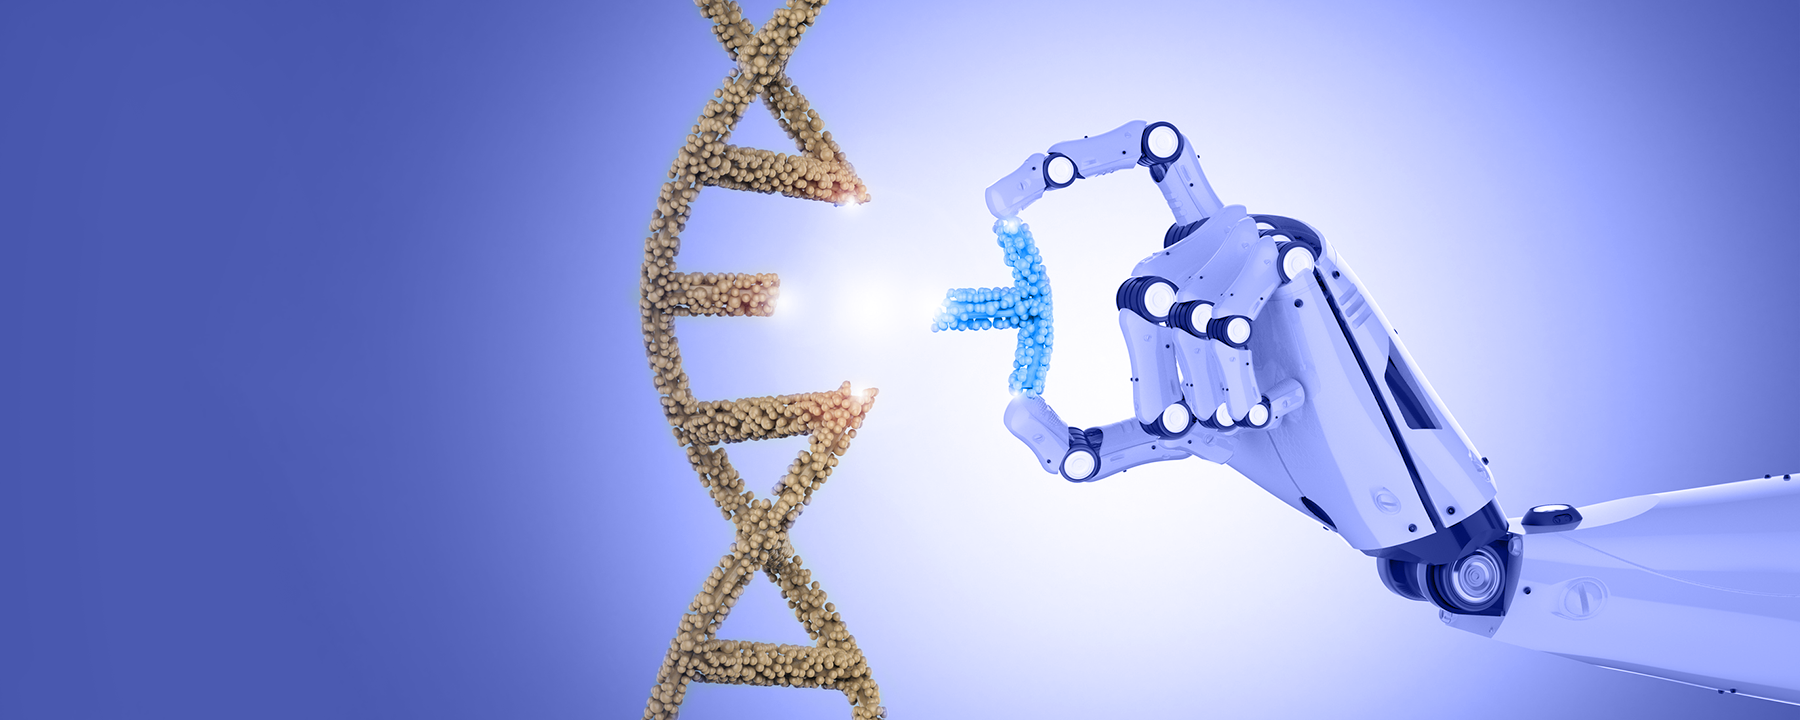

In [19]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [20]:
prompt = """Tis pic shows a robot and DNA.
Given the things I mentioned above, based on what you see in the image, describe everything happening in this picture. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

In [21]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content([prompt, img])
print(response.text)

```json
{
  "description": "A robotic arm is interacting with a DNA strand. The robotic arm, which is white and metallic, appears to be delicately manipulating a segment of the DNA. The DNA strand is depicted in a three-dimensional representation with a golden hue, showing its double helix structure. The scene is set against a soft purple background, and a subtle light effect is visible near the point of interaction between the robot and the DNA.",
  "features": [
    "Robotic arm",
    "DNA double helix",
    "Interaction between robot and DNA",
    "Three-dimensional representation",
    "Golden-colored DNA",
    "Purple background",
    "Light effect",
    "Delicate manipulation"
  ]
}
```


**Freeform Conversations (History)**

In [22]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

In [23]:
response = chat.send_message("In one sentence, explain what is CRISPR to a young child.")
print(response.text)

CRISPR is like a pair of tiny scissors that scientists use to carefully cut and fix mistakes in our DNA, like typos in a really long book!



In [24]:
print(chat.history)

[parts {
  text: "In one sentence, explain what is CRISPR to a young child."
}
role: "user"
, parts {
  text: "CRISPR is like a pair of tiny scissors that scientists use to carefully cut and fix mistakes in our DNA, like typos in a really long book!\n"
}
role: "model"
]


In [ ]:
# Chat continuation (check history after this)

response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
print(response.text)

CRISPR-Cas9 is a gene-editing tool that uses a guide RNA molecule to target a specific DNA sequence, where a Cas9 enzyme acts like molecular scissors to cut the DNA at that precise location.  This cut allows scientists to then either disable a gene, insert a new gene, or correct a faulty gene, offering potential for treating genetic diseases and other applications.



**Setting Temperature (Higher values give more creative response than the lower values)**

In [25]:
model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9,
    ))

In [26]:
response = model.generate_content(
    'Give me a numbered list of facts about Albert Einstein.',
    # Limit to 5 facts.
    generation_config = genai.GenerationConfig(stop_sequences=['\n6'])
)

In [27]:
print(response.text)

1. **He was born in Ulm, Germany, on March 14, 1879.**

2. **Einstein failed his entrance exam to the Zurich Polytechnic.**  He did exceptionally well in mathematics and physics, but struggled in other subjects.

3. **He developed the theory of relativity.** This includes both special relativity (1905) and general relativity (1915), revolutionizing our understanding of space, time, gravity, and the universe.

4. **He received the Nobel Prize in Physics in 1921.**  However, it was not for his theory of relativity, but for his explanation of the photoelectric effect.

5. **He was a pacifist and a Zionist.** He advocated for peace and supported the creation of a Jewish homeland in Palestine.

